In [2]:
from math import sin,cos,pi,log,exp

In [3]:
dt=0.001

In [4]:
f=open('redtraj-5-0.rmsd')
traj=[]
for l in f:
    l=l.split()
    traj.append(float(l[1]))
f.close()

In [5]:
ev1=[cos(x*pi) for x in traj]

In [6]:
def comp_eval(traj,dt=1):
    from math import log
    xx=0
    xx1=0
    for i in range(len(traj)-dt):
        xx=xx+traj[i]**2
        xx1=xx1+traj[i+dt]*traj[i]
    xx1=xx1/xx
    return -log(xx1)/dt


ldt=[2**i for i in range(11)]
for dt in ldt:
    try: print (dt,comp_eval(ev1,dt)/.001) # divide by dt=0.001 of the diffusion trajectory timestep
    except: pass

1 478.0714541192393
2 304.66866354159646
4 191.16256440084817
8 118.92905794826477
16 75.1735574918109
32 48.343533277182004
64 31.935949215524733
128 22.466303105965817
256 15.687279430619924
512 9.860543507582284
1024 4.505750362740965


In [7]:
def comp_theta(traj,ldt,tinf,dx):
    from math import exp, log
    mu=comp_eval(traj,tinf)
    lx,lz0c1=comp_Z0c1(traj,dx=dx) # for dt>1 z0c1 needs rescaling as z0c1/dt
    ltheta=[]
    for dt in ldt:
        lx,lzc1=comp_Zca(traj,a=1,dx=dx,dt=dt)
        sc=(1-exp(-mu*dt))/dt # the 1/dt factor is to rescale z0c1 -> z0c1/dt
        ly=[-log(zc1/z0c1/sc) for zc1,z0c1 in zip(lzc1,lz0c1)]
        ltheta.append(ly)
    return lx,ltheta

def comp_Z0c1(lx,dx,strict=False):
    import math
    dzc={}
    tmax=len(lx)
    for i in range(tmax):
        x=lx[i]
        lastx=0
        d=abs(x-lastx)
        if dx!=None and not strict: 
            x=math.floor(x/dx)*dx
            lastx=math.floor(lastx/dx)*dx
        if lastx<x:
            dzc[lastx]=dzc.get(lastx,0)+d
            dzc[x]=dzc.get(x,0)-d
        else:  
            dzc[x]=dzc.get(x,0)+d
            dzc[lastx]=dzc.get(lastx,0)-d
    keys=list(dzc.keys())
    keys.sort()
    lx=[]
    ly=[]
    z=0
    for x in keys:
        lx.append(x)
        ly.append(float(z))
        z=z+dzc[x]
    if not strict:ly[0]=ly[1]
    return lx,ly 
def comp_Zca(lx, a, dt=1, strict=False, dx=1e-3, zcmin=1e-8, mindx=1e-3):
    import math
    dzc={}
    tmax=len(lx)
    for i in range(0,tmax-dt):
        x=lx[i+dt]
        lastx=lx[i]
        d=abs(x-lastx)
        if a<0 and d<mindx:d=mindx
        if a==0: d=1 
        else: d=float(d)**a
        if dx!=None and not strict: 
            x=math.floor(x/dx)*dx
            lastx=math.floor(lastx/dx)*dx
        if lastx<x:
            dzc[lastx]=dzc.get(lastx,0)+d
            dzc[x]=dzc.get(x,0)-d
        else:  
            dzc[x]=dzc.get(x,0)+d
            dzc[lastx]=dzc.get(lastx,0)-d
    keys=list(dzc.keys())
    keys.sort()
    lx=[]
    ly=[]
    z=0
    for x in keys:
        lx.append(x)
        ly.append(float(z)/dt/2)
        z=z+dzc[x]
        if strict:
            lx.append(x)
            y=float(z)/dt/2
            if y<zcmin: y=0.0
            ly.append(y)
    if not strict:
        ly[0]=ly[1] # ly[0] equals 0, but a non-zero value is more convenieint for further analysis
    return lx,ly 

(-0.05, 0.15)

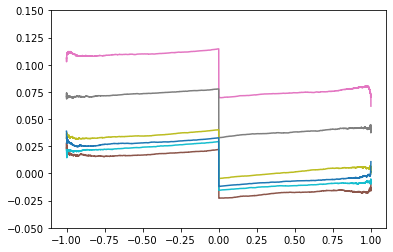

In [8]:
lx,ltheta=comp_theta(ev1,ldt,tinf=32,dx=0.0001)
%matplotlib inline
import matplotlib.pyplot as plt
for ly in ltheta:
    plt.plot(lx,ly)
plt.ylim((-0.05,0.15))

In [9]:
ev12=[cos(x*pi)+0.5*cos(x*5*pi) for x in traj]
for dt in ldt:
    try: print (dt,comp_eval(ev12,dt)/0.001)
    except: pass

1 693.7378974105228
2 414.1546012169043
4 246.0083644039014
8 146.70479797265457
16 88.89969922426998
32 55.317475535758945
64 35.27271549749221
128 24.163333684590093
256 16.505600416944997
512 10.220269264959372
1024 4.702753559122674


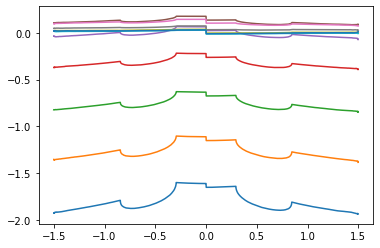

In [10]:
lx,ltheta=comp_theta(ev12,ldt,tinf=16,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)

1 0.0007253535046250958
2 0.0005677924126048687
4 0.00044026857041968605
8 0.00033633331011910327
16 0.0002531425077606082
32 0.000188408482222034
64 0.00013616714484838592
128 9.336553499774466e-05
256 5.70162609946002e-05
512 2.929332115305944e-05
1024 1.5304705739970574e-05


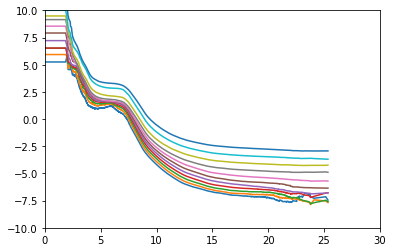

In [11]:
ev1=[x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev1,dt))
    except: pass

lx,ltheta=comp_theta(ev1,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(0,30)
_=plt.ylim(-10,10)


1 0.0033405059851995657
2 0.0026375533654935594
4 0.0020507869194784168
8 0.0015612360802863524
16 0.0011660787402058143
32 0.0008575019108906449
64 0.0006081445566821266
128 0.0004077333029463585
256 0.00024457939546506405
512 0.00012583036650828778
1024 6.498726973688184e-05


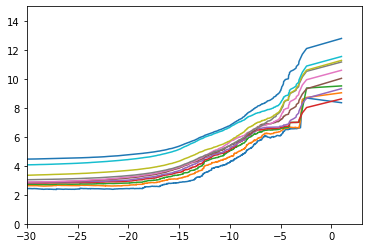

In [12]:
ev2=[1-x*x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev2,dt))
    except: pass

lx,ltheta=comp_theta(ev2,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-30,3)
_=plt.ylim(0,15)

1 0.0037003587242955115
2 0.0029228863231106086
4 0.00227307586788964
8 0.0017303950112241785
16 0.0012922305420614852
32 0.0009500153084441986
64 0.0006734270498566551
128 0.00045123564313232764
256 0.0002705408581514515
512 0.0001392001319691975
1024 7.186227306671373e-05


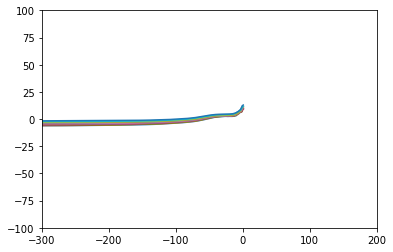

In [13]:
ev12=[1-x*x+x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev12,dt))
    except: pass

lx,ltheta=comp_theta(ev12,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-300,200)
_=plt.ylim(-100,100)

In [14]:
# load eigenvectors
import numpy as np
evs=np.load('retraj-5-0.rmsd ')
evs=data['evs']

ldt=[2**i for i in range(11)]
lx,ltheta=comp_theta(evs[:,0],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-1.8,1.3)
_=plt.ylim(-0.2,0.25)

FileNotFoundError: [Errno 2] No such file or directory: 'retraj-5-0.rmsd '

In [ ]:
lx,ltheta=comp_theta(evs[:,1],ldt,tinf=1024,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-0.5,4.45)
_=plt.ylim(-0.15,0.15)

